In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import  linear_model
%matplotlib inline
from ggplot import *
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

In [39]:
wine = pd.read_csv('D:/Exercise_Case_Onsite_Modeling_Wine/Case_Onsite_Modeling_Wine/Case_Onsite_Modeling_Wine/Case_Onsite_Modeling_Wine/wine_dataset.csv')

In [40]:
wine.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':'citric_acid','volatile acidity':'volatile_acidity','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)

In [54]:
red_wine=wine[wine['style']=='red']
#red_wine=red_wine[:][:-1]
red_wine.head()
white_wine=wine[wine['style']=='white']
#white_wine=white_wine[:][:-1]
type(white_wine)

pandas.core.frame.DataFrame

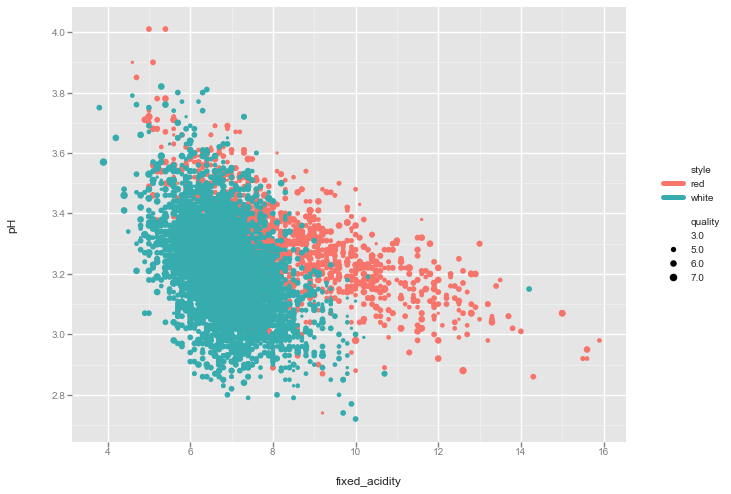

<ggplot: (13774531)>

In [113]:
ggplot(wine, aes(x='fixed_acidity', y='pH',color='style' ,size='quality')) + \
geom_point() 

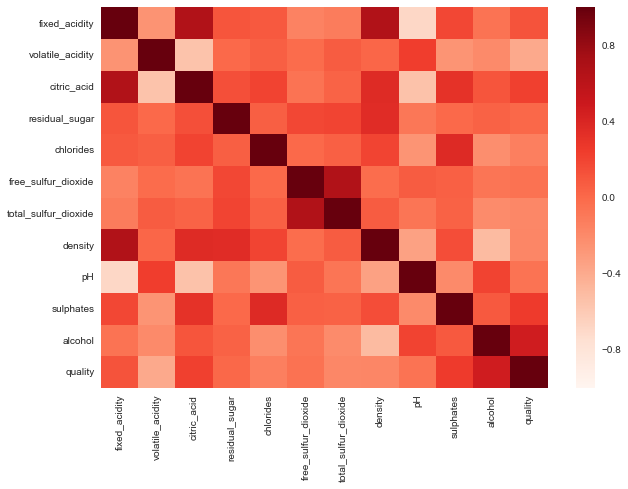

In [116]:
plt.subplots(figsize=(10,7))
red_corr=red_wine.corr()
sns.heatmap(data=red_corr,xticklabels=red_corr.columns.values,
            yticklabels=red_corr.columns.values,
           cmap="Reds")
plt.show()

In [60]:
red_wine.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


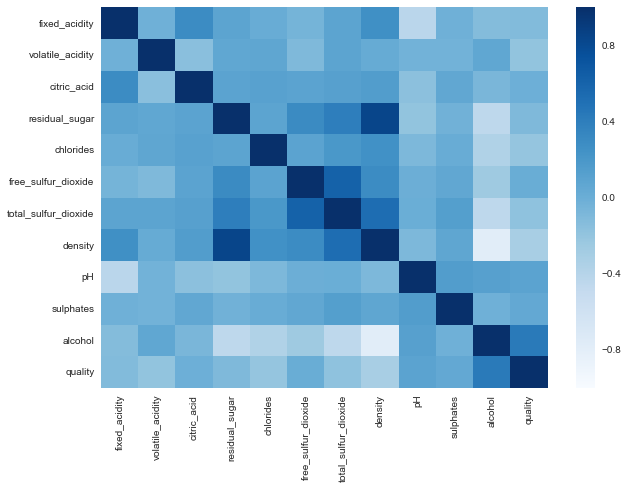

In [117]:
plt.subplots(figsize=(10,7))
white_corr=white_wine.corr()
sns.heatmap(data=white_corr,xticklabels=white_corr.columns.values,yticklabels=white_corr.columns.values,cmap='Blues')
plt.show()

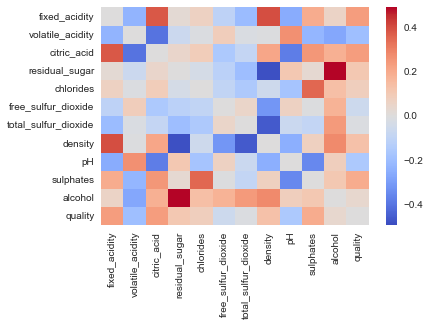

In [77]:
diff_corr=red_corr-white_corr
sns.heatmap(data=diff_corr,xticklabels=diff_corr.columns.values,yticklabels=diff_corr.columns.values, cmap='coolwarm')


In [80]:
df = pd.get_dummies(wine, columns=["style"])

In [100]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.1, random_state=4)

In [101]:
y = train["quality"]
cols = ["total_sulfur_dioxide","free_sulfur_dioxide","residual_sugar","fixed_acidity",
        "volatile_acidity","alcohol","sulphates","pH","density","citric_acid","chlorides"]

X=train[cols]

In [102]:
regr = linear_model.LinearRegression()
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [103]:
ytrain_pred = regr.predict(X)
print("In-sample Mean squared error: %.2f"
      % mean_squared_error(y, ytrain_pred))

In-sample Mean squared error: 0.54


In [104]:
ytest = test["quality"]
cols = ["total_sulfur_dioxide","free_sulfur_dioxide","residual_sugar","fixed_acidity","volatile_acidity","alcohol","sulphates","pH","density",
       "citric_acid","chlorides"]

Xtest=test[cols]

In [105]:
ypred = regr.predict(Xtest)
print("Out-of-sample Mean squared error: %.2f"
      % mean_squared_error(ytest, ypred))

Out-of-sample Mean squared error: 0.53
